# $\color{green}{\text{Normal Distribution}}$
***

#### Outline  <a class="anchor" id="Outline"></a>
* [Probability](#Probability)

* [Probability Density Function](#PDF)

    * [Normal distribution Part 1 & Part 2 combined](#Combined)

* [Properties of the Normal Distribution](#Properties)

* [The Empirical Rule](#Empirical)

* [References](#References)

This notebook will introduce the main concepts of Normal distribution and explain those concepts using the Python programming language to create visuals. 

In [1]:
# Import packages 

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Set a global paramter for plot sizes
plt.rcParams['figure.figsize'] = 12,6

## Probability <a class="anchor" id="Probability"></a>
***

[Back to outline](#Outline)

Probability is the likelihood of an event occurring. **[1]** In mathematical terms, it is a numerical description of how likely an event is to occur where 0 means that it is impossible and 1 means that it is certain. It can be described by this formula **[2]**:   

$$ Probability = \frac{number\, of\, desired\, outcomes}{total\, number\, of\, outcomes} $$

For example, a coin has two sides, one head and one tail. To determine the probability of a fair coin landing with it's heads up when tossed, we can calculate the probability as follows: 

In [2]:
# Probability of heads
desired = 1 # heads, one side of coin
total = 2 # coin has 2 sides

prob = desired / total
print(f"The probability of heads landing in a coin toss is {prob} or {prob*100}%")

The probability of heads landing in a coin toss is 0.5 or 50.0%


While coin tossing is a simple illustration, probability is used to help us address questions which can't be answered with absolute certainty of correctness. For example, if a clinical trial 
shows that a drug is effective among 90% of the study participants, we can use probability to ascertain if this success rate can be repeated with a different sample of patients. 

It would be impossible to test the effectiveness of drug on all patients with a particular condition so we need to be able to generalize the data generated in sample populations. We can draw a random sample from a larger target population and establish through statistics how well the sample represents the larger population with a sampling distribution. **[3]**

In most instances of statistical inference, we use the idealized mathematical descriptions of  sampling distributions. The Normal distribution is one of the most common statistical tests found in research across all disciplines.

 > _"The normal distribution is essentially a frequency distribution curve which is often formed naturally by continuous random variables."_ **[4]**

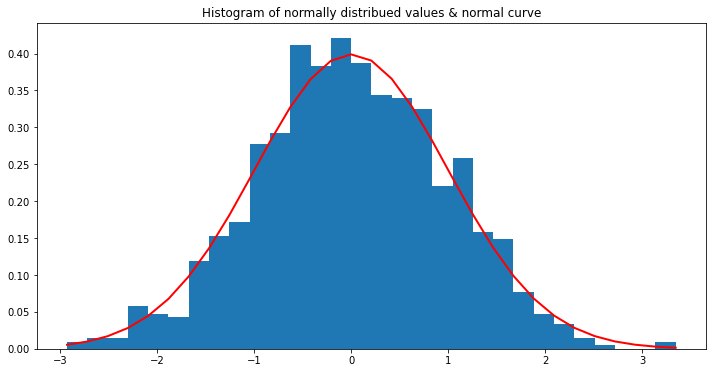

In [22]:
# Plot a normal distribution curve based on random variables

# Generate random variables using numpy.random.normal function
mu, sigma = 0, 1 # mean and standard deviation
sample = np.random.normal(mu, sigma, 1000)

# Plot a histogram
count, bins, ignored = plt.hist(sample, 30, density=True)

# Plot a curve based on the histogram 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title("Histogram of normally distribued values & normal curve")
plt.show()


## Probability Density Function <a class="anchor" id="PDF"></a>
***

[Back to outline](#Outline)

A continuous random variable is one which takes an infinite number of possible values. Examples of continuous random variables include IQ scores, the amount of cash a person carries, babys' birth weights, and SAT scores used for college admissions in the US. 

Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral). **[5]**

The probability distribution of a continuous random variable, known as probability distribution functions, are the functions that take on continuous values.  

The **probability density function (PDF) of the Normal Distribution** is expressed by this equation

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

We can use Python to calculate and plot the pdf of the normal distribution by breaking the equation into smaller parts, fixing $\mu$ and $\sigma$ and varying x. 

Let $\mu$ = 0 and $\sigma$ = 1, 

__Part 1:__ 

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} $$


In [4]:
# Use the numpy mathematical functions to find square root (np.sqrt) and insert pi (np.pi)
sigma = 1.0
part_1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
part_1

0.3989422804014327

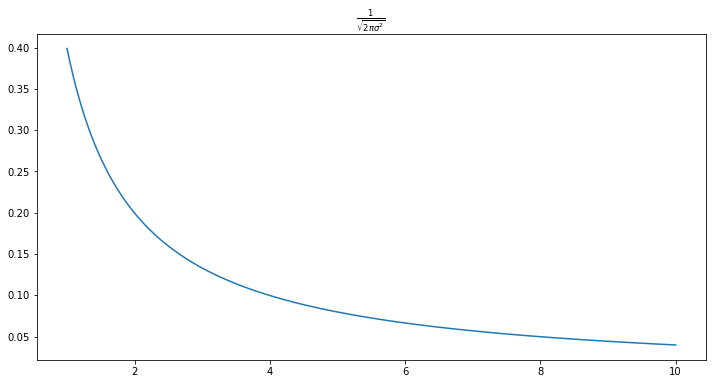

In [30]:
# Plot Part 1
sigma_vals = np.linspace(1.0, 10.0, 1000)

plt.title(r"$\frac{1}{\sqrt{2 \pi \sigma^2 }}$ ")
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2));

__Part 2:__ 

$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Let $\mu$ = 0 and $\sigma$ = 1, 

$$ e^{-\frac{(x - 0)^2}{2(1)^2}} $$

$$ e^{-\frac{(x)^2}{2}} $$

$ e^{-(x)^2} $  is built into numpy with the np.exp() function


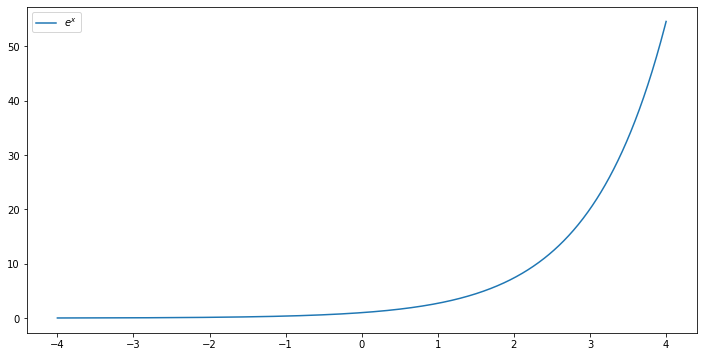

In [6]:
# Range of x values for plotting.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of e^x
plt.plot(x, np.exp(x), label=r'$e^{x}$');

plt.legend();

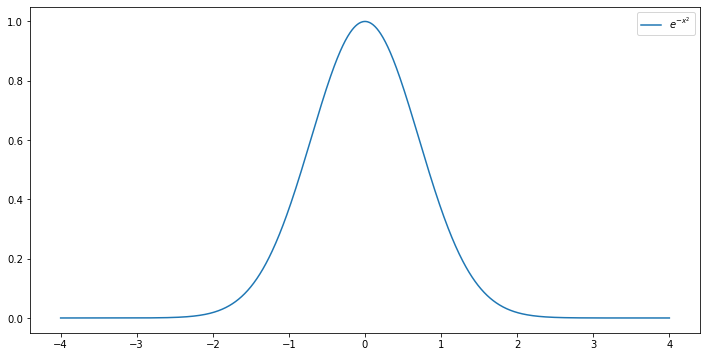

In [7]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x squared. 
plt.plot(x, np.exp(-(x**2)), label=r'$e^{-x^2}$')

# Absolute legend.
plt.legend();

Negative values when squared are positive so reflect the positive values squared. The curve peaks at 1 because e<sup>0</sup> = 1

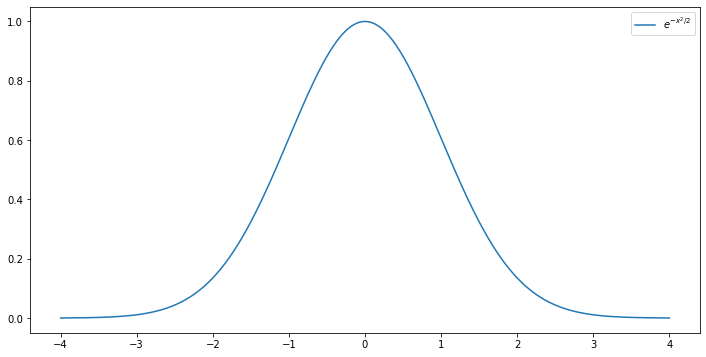

In [8]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x squared and divided by 2
plt.plot(x, np.exp(-(x**2 / 2)), label=r'$e^{-x^2/2}$') 

# Absolute legend.
plt.legend();

The curve seems to have widened when $e^{-x^2}$ is divided by 2

Now replace 0 for $\mu$ and 1 for $\sigma$ in the statement and supply these values to numpy.

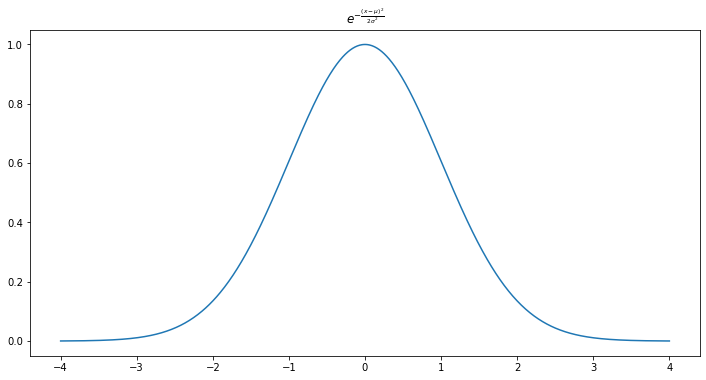

In [9]:
# These are involved in the exponent.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of Part 2.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))))

plt.title(r'$e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$'); 


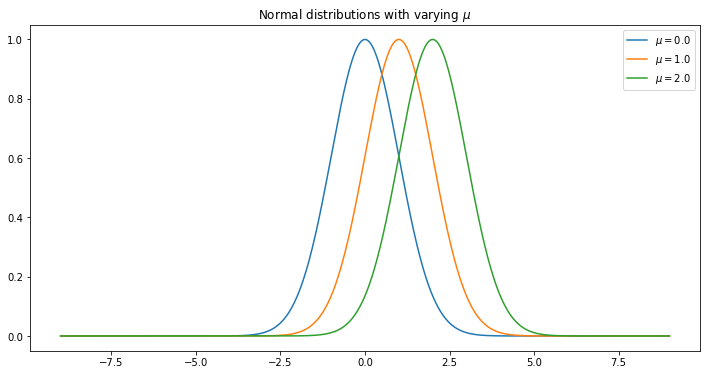

In [34]:
# These are involved in the exponent.
mu, sigma = 2.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

for mu in [0.0, 1.0, 2.0]: 
# Plot of full e part of normal pdf.
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

plt.title(r"Normal distributions with varying $\mu$")
    
# Plot legend
plt.legend();


Changing the value of $\mu$ changes the position of the peak. Hence in `random.normal(loc=0.0, scale=1.0, size=None)`, *loc* denotes $\sigma$

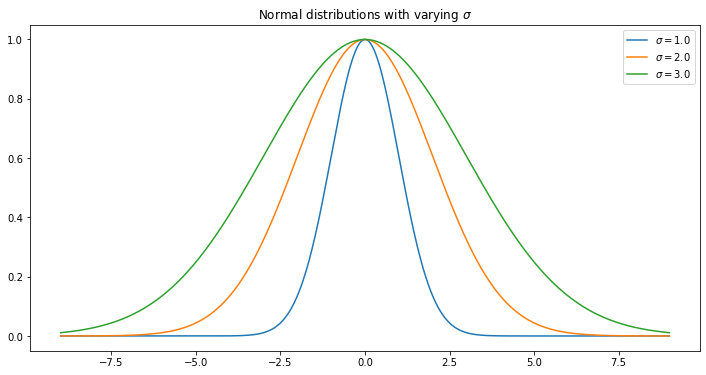

In [35]:
# These are involved in the exponent.
mu, sigma = 0.0, 2.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

for sigma in [1.0, 2.0, 3.0]: 
# Plot of full e part of normal pdf.
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$');

plt.title(r"Normal distributions with varying $\sigma$")    
plt.legend();

Changing the value of $\sigma$ changes the width/spread of the curve.
Hence in `random.normal(loc=0.0, scale=1.0, size=None)`, *scale* denotes $\sigma$

### Normal distribution Part 1 & Part 2 combined <a class="anchor" id="Combined"></a>

 $$ PDF = \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
 
 [Back to outline](#Outline)

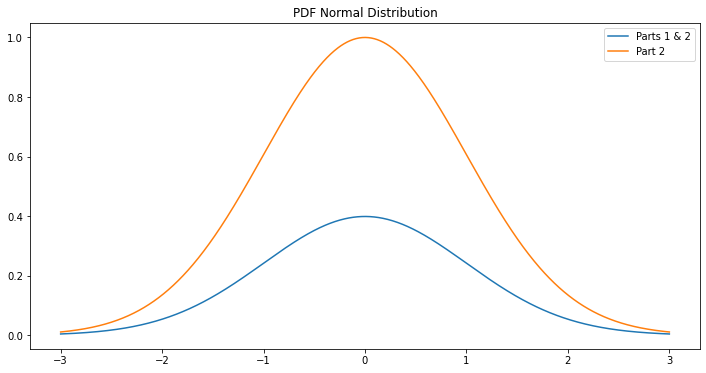

In [12]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y.
plt.plot(x, y, label='Parts 1 & 2')
# Show without scaling by first part.
plt.plot(x, part2, label='Part 2')
plt.title("PDF Normal Distribution")
plt.legend();

The effect of part 1 is that is 'squishes' the orange curve down so that the area of the blue curve is under 1. When you integrate the blue curve, the area will be under 1. Something with the probability of 1 is always going to happen so in order to estimate probability, the curve must be under 1.

### Properties of the Normal Distribution <a class="anchor" id="Properties"></a>
***

[Back to outline](#Outline)

The Normal Distribution is best known as the 'bell curve' from the shape of the curve with a peak in middle and diminishing tails. It is also know as the Gaussian distribution after Carl Friedrich Gauss, a German mathematician who first described the normal distribution law. **[6]**

The data clusters in a symmetric distribution around the peak which is the mean ($\mu$) of the distribution. The width of the curve is determined by the standard deviation ($\sigma$). These 2 parameters of the normal distribution determine the shape of the curve as can be seen in the next plot. 

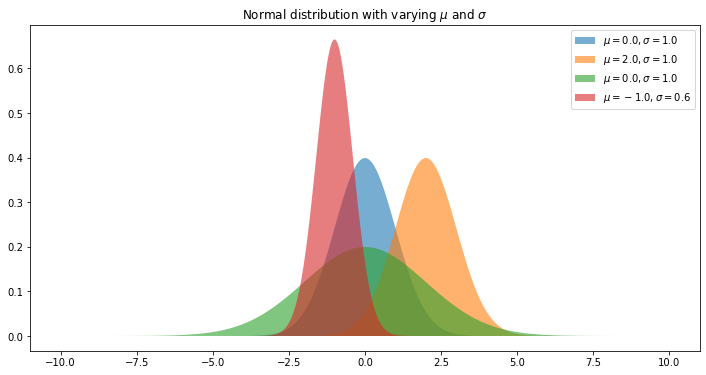

In [13]:
# Adapted from Statistical Bias lecture, Programming for Data Analytics 
# https://web.microsoftstream.com/video/962405f9-e723-47b5-88d9-045b0bdd2999
# Return evenly spaced numbers over a specified interval.
x = np.linspace(-10.0, 10.0, 1000)

# Generate normal distribution using scipy.stats 

plt.fill(x, ss.norm.pdf(x, loc = 0.0, scale = 1.0), label = r"$\mu = 0.0, \sigma = 1.0$", alpha = 0.6, lw = 3.0)
plt.fill(x, ss.norm.pdf(x, loc = 2.0, scale = 1.0), label = r"$\mu = 2.0, \sigma = 1.0$", alpha = 0.6, lw = 3.0)
plt.fill(x, ss.norm.pdf(x, loc = 0.0, scale = 2.0), label = r"$\mu = 0.0, \sigma = 1.0$", alpha = 0.6, lw = 3.0)
plt.fill(x, ss.norm.pdf(x, loc = -1.0, scale = 0.6), label = r"$\mu = -1.0, \sigma = 0.6$", alpha = 0.6, lw = 3.0)

plt.title("Normal distribution with varying $\mu$ and $\sigma$")
plt.legend();

### The Empirical Rule <a class="anchor" id="Empirical"></a>

[Back to outline](#Outline)

As is evident in the green curve above, the tails of the curve seem to continue indefinitely without touching the x-axis. The normal function has no closed-form integral so the tails continue to infinity **[7]**. However, areas under the curve, can be approximated with methods like numerical integration and these areas correspond to probabilities. These probabilities allow us to figure out the probability of a variable from the distribution being within a certain range. 

 - Probability of an observation being within 1 standard deviation of the mean = 68.27% / 0.6827
 - Probability of an observation being within 2 standard deviations of the mean = 95.45% / 0.9545
 - Probability of an observation being within 3 standard deviations of the mean = 99.73% / 0.9973

This 68-95-99 breakdown of probabilites in the Normal distribuion is known as the Empirical Rule in statistics or the Three Sigma Rule.**[8]** The probabilty intervals are illustrated on the normal distribution in the next plot, where blue shows +/- 1$\sigma$, green shows +/- 2$\sigma$ and red shows +/- 3$\sigma$


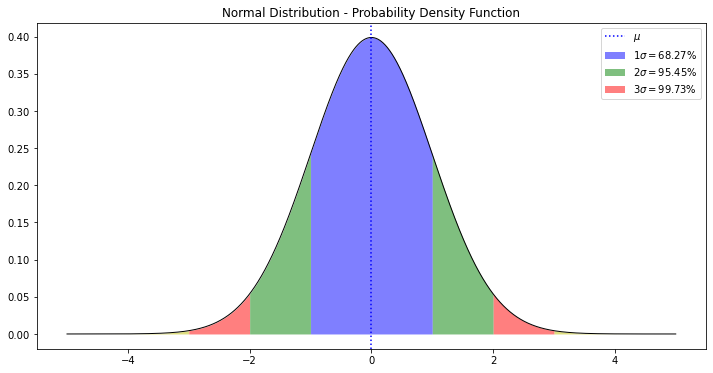

In [14]:
# Adapted from Statistical Bias lecture, Programming for Data Analytics 
# https://web.microsoftstream.com/video/962405f9-e723-47b5-88d9-045b0bdd2999
# Return evenly spaced numbers over a specified interval.
x = np.linspace(-5.0, 5.0, 10000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

xseg = x[np.logical_and(-5.0 <= x, x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-3.0 <= x, x <= -2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-2.0 <= x, x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-1.0 <= x, x <= 1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='b', alpha=0.5, linewidth=0, label=r"$1 \sigma = 68.27\%$")
xseg = x[np.logical_and(1.0 <= x, x <= 2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0, label=r"$2 \sigma = 95.45\%$")
xseg = x[np.logical_and(2.0 <= x, x <= 3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0, label=r"$3 \sigma = 99.73\%$")
xseg = x[np.logical_and(3.0 <= x, x <= 5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)
plt.axvline(x=0.0, color='b', linestyle=":", label =r"$\mu$")

plt.title("Normal Distribution - Probability Density Function")
plt.legend();

With the 68-95-99 rule, we can make various estimations. For example, we know that the lifespan of lions at a certain zoo are normally distributed. If we know the average lifespan (12.5 years) and the standard deviation (2.4 years), we can use the empirical rule to estimate the probability of a lion living longer than 10.1 years. 

$\mu$ = 12.5 years

$\sigma$ = 2.4 years

$\mu$ - 1 $\sigma$ = 10.1 years 


10.1 years falls within 1$\sigma$ or 68% of the curve. This means that the remaining 32% percent of lions will have lifespans that fall outside the blue shaded area on the plot above.  Because the normal distribution is symmetrical, half (16%) will live less than 10.1 years and the other half (16%) will live longer than 14.9 years. 

The probability of a particular lion living longer than 10.1 years is 68% + 16% or 84% **[9]**

### References <a class="anchor" id="References"></a>
1. https://en.wikipedia.org/wiki/Probability
2. https://thirdspacelearning.com/gcse-maths/probability/how-to-calculate-probability/ 
3. Manfred Stommel P, Katherine J. Dontje PF-B. Statistics for Advanced Practice Nurses and Health Professionals. New York, NY: Springer Publishing Company; 2014. Available from: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=782334&site=eds-live&scope=site 
4. Introduction to Normal Distribution. (2021, July 29). https://stats.libretexts.org/@go/page/4575
5. https://www.datacamp.com/tutorial/probability-distributions-python
6. https://en.wikipedia.org/wiki/Normal_distribution
7. Vilalta CJ. Normal distribution. Salem Press Encyclopedia of Science [Internet]. 2022 ; Available from: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=ers&AN=94981990&site=eds-live&scope=site
8. https://statisticsbyjim.com/probability/empirical-rule/
9. https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/stats-normal-distributions/e/empirical_rule
10. https://linuxhint.com/add-table-contents-jupyter-notebook/